## PCA on 3D dataset

- Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$ standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
- $x_1$ is distributed as $N(0,1)$
- $x_2$ is distributed as $x_1+N(0,3)$
- $x_3$ is given by $2x_1+x_2$
- Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
- Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
- What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
- Redefine the data in the basis yielded by the PCA procedure
- Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt



N=5000 #numper of entries
mean=0
x_1= np.random.normal(0, 1, N).T #defining the first array
x_2= x_1+np.random.normal(0, 1 , N).T #defining the second array
x_3= 2*x_1+x_2 #defining the third array

X = np.array([x_1,x_2,x_3]) #creating the matrix with the arrays


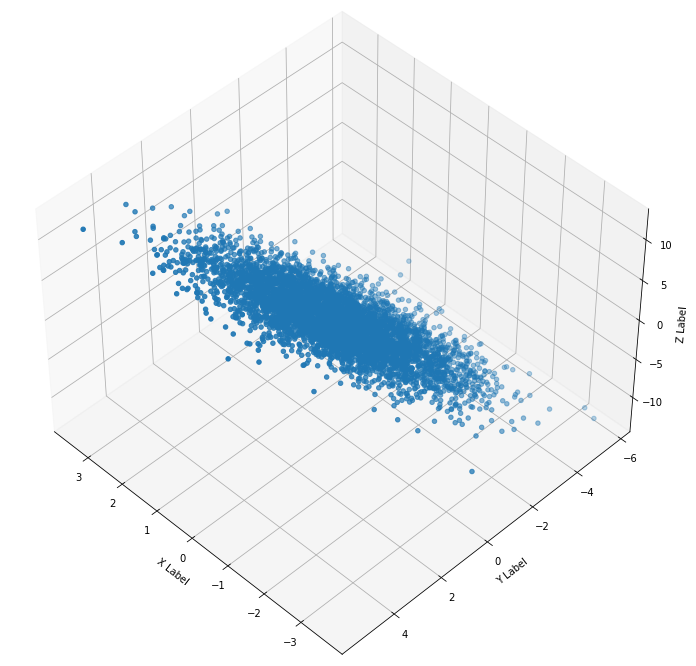

In [2]:
fig = plt.figure(figsize=(12,12)) #plotting the datas in a 3D plot
ax = fig.add_subplot(projection='3d')

ax.scatter(x_1,x_2,x_3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(45, 135)

In [3]:
cov=np.cov(X) #definining the covariance matrix
print('the covariance matri is:')
print(cov)

corr_x1_x2=(cov[0,1])/((cov[0,0]**(1/2))*(cov[1,1]**(1/2))) #calculating correlations
corr_x1_x3=(cov[0,2])/((cov[0,0]**(1/2))*(cov[2,2]**(1/2)))
corr_x2_x3=(cov[1,2])/((cov[1,1]**(1/2))*(cov[2,2]**(1/2)))

print('\n')
print(f'the correlation between x_1 and x_2 is:{corr_x1_x2}')
print(f'the correlation between x_1 and x_3 is:{corr_x1_x3}')
print(f'the correlation between x_2 and x_3 is:{corr_x2_x3}')

the covariance matri is:
[[1.00541817 0.99062292 3.00145925]
 [0.99062292 1.99682111 3.97806694]
 [3.00145925 3.97806694 9.98098543]]


the correlation between x_1 and x_2 is:0.69914205563994
the correlation between x_1 and x_3 is:0.9474850722443728
the correlation between x_2 and x_3 is:0.8910781540768425


In [4]:
l, P = la.eig(cov) #calculating the eigenvectors and the eigenvalues of the covarianve matrix

print('eigenvalues') 
print (l) #printing the eigenvalues
print('\n')
print('eigenvectors')
print (P) #printing the eigenvectors
print('\n')
for i in range(1,4):
    print(f'the eigenvector {i} is: {[P[0][i-1],P[1][i-1],P[2][i-1]]}')

print('\n')
print('the covariance matrix calculated with the eigenvectors and the eigenvalues')
print(np.dot(P,np.dot(np.diag(l),P.T)))

eigenvalues
[1.24902115e+01+0.j 1.07190743e-16+0.j 4.93013164e-01+0.j]


eigenvectors
[[-0.26477614 -0.81649658  0.51305646]
 [-0.36358712 -0.40824829 -0.83733968]
 [-0.89313941  0.40824829  0.18877324]]


the eigenvector 1 is: [-0.2647761406957279, -0.36358712444428126, -0.8931394058357379]
the eigenvector 2 is: [-0.8164965809277257, -0.40824829046386335, 0.4082482904638632]
the eigenvector 3 is: [0.5130564575674007, -0.8373396779513507, 0.18877323718344843]


the covariance matrix calculated with the eigenvectors and the eigenvalues
[[1.00541817+0.j 0.99062292+0.j 3.00145925+0.j]
 [0.99062292+0.j 1.99682111+0.j 3.97806694+0.j]
 [3.00145925+0.j 3.97806694+0.j 9.98098543+0.j]]


In [5]:
U, spectrum, Vt = la.svd(X) #calculating U,D and Vt

print('U matrix')
print(U) #printing U matrix
print('\n')
print('D matrix')
print(spectrum) #printing D matrix
print('\n')
print('Vt matrix')
print(Vt) #printing Vt matrix
print('\n')
print('\n')
print('eigenvalues')
print(spectrum**2/(N-1)) #printing the eigenvalues
print('\n')
print('eigenvectors')
print(U) #printing the eigenvectors
print('\n')
for i in range(1,4):
    print(f'the eigenvector is: {[U[0][i-1],U[1][i-1],U[2][i-1]]}')

print('\n')


U matrix
[[-0.26479018  0.51304921 -0.81649658]
 [-0.36356422 -0.83734962 -0.40824829]
 [-0.89314457  0.1887488   0.40824829]]


D matrix
[2.49905240e+02 4.96463928e+01 2.44573221e-14]


Vt matrix
[[-1.28971888e-04  2.31757563e-03 -2.00318069e-02 ... -2.81755705e-02
   7.30888957e-03 -7.80387265e-04]
 [-1.80314195e-02 -1.81106076e-02 -1.84377563e-02 ...  3.81118857e-03
   5.86293942e-03  2.66158827e-02]
 [-4.03126392e-01  8.79067431e-01 -3.63594886e-03 ... -3.46700839e-03
  -3.42447480e-03  2.61475994e-03]
 ...
 [ 1.92840776e-02  1.13310949e-02 -2.06152029e-02 ...  9.99132902e-01
   1.12140902e-04 -7.05249477e-05]
 [-2.40554938e-03  3.25180845e-03  5.67504991e-03 ...  2.00415790e-04
   9.99932300e-01 -1.60328688e-04]
 [ 1.84159297e-02  7.21187546e-03  1.96276059e-02 ... -6.27928710e-05
  -7.68534952e-05  9.99266411e-01]]




eigenvalues
[1.24930244e+01 4.93051474e-01 1.19656052e-31]


eigenvectors
[[-0.26479018  0.51304921 -0.81649658]
 [-0.36356422 -0.83734962 -0.40824829]
 [-0.893144

From the two procedures I get very similar eigenvectors and two of the eigenvalues are very similar. In the eigenvalues just one is completely different but in both cases the eigenvalue is almost zero. So I suppose that there is a problem of different approximation in the two alghorithms wich leads to different results if compared but the meaning of the results is almost the same because they are both almost zero.

Note: The eigenvectors and the eigenvalues are not printed in the same order in the two precesses

In [6]:
l, V = la.eig(cov)

Lambda=np.diag(l) #calculating the diagonal matrix of the eigenvalues
print('the diagonal matrix of the eigenvalues is:')
print (Lambda) #printing the diagonal matrix of the eigenvalues

print('\n')
print ("trace of the covariance matrix:", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print('\n')
print('the variability of the components is explained by the next values(eigenvalues normalized with the trace):')
print (f'for the first eigenvalue it is:{Lambda[0,0]/(Lambda.trace())}') #calculating the eigenvalues normalized with the trace
print (f'for the second eigenvalue it is:{Lambda[1,1]/Lambda.trace()}')
print (f'for the third eigenvalue it is:{Lambda[2,2]/Lambda.trace()}')



the diagonal matrix of the eigenvalues is:
[[1.24902115e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.07190743e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 4.93013164e-01+0.j]]


trace of the covariance matrix: 12.983224702312304
Lambda.trace(): (12.983224702312306+0j)


the variability of the components is explained by the next values(eigenvalues normalized with the trace):
for the first eigenvalue it is:(0.9620269096859663+0j)
for the second eigenvalue it is:(8.256095535163802e-18+0j)
for the third eigenvalue it is:(0.0379730903140338+0j)


In [7]:
Xp = np.dot(V.T, X) #rotating the original matrix
print(Xp)

print('\n')
print('the reduced dataset is the one including the first and third column of the rotated matrix')
Y=np.array([Xp[0,:],Xp[2,:]])
print(Y)

[[-3.22552419e-02  5.79149694e-01 -5.00607854e+00 ... -7.04121752e+00
   1.82653776e+00 -1.94986715e-01]
 [-4.27418554e-16 -4.80009343e-16  2.30013764e-16 ...  6.45148690e-16
  -8.76633652e-17  5.97699180e-16]
 [-8.95194052e-01 -8.99142184e-01 -9.15231133e-01 ...  1.89404403e-01
   2.91023822e-01  1.32138790e+00]]


the reduced dataset is the one including the first and third column of the rotated matrix
[[-0.03225524  0.57914969 -5.00607854 ... -7.04121752  1.82653776
  -0.19498672]
 [-0.89519405 -0.89914218 -0.91523113 ...  0.1894044   0.29102382
   1.3213879 ]]


Text(0, 0.5, 'eigenvector 2')

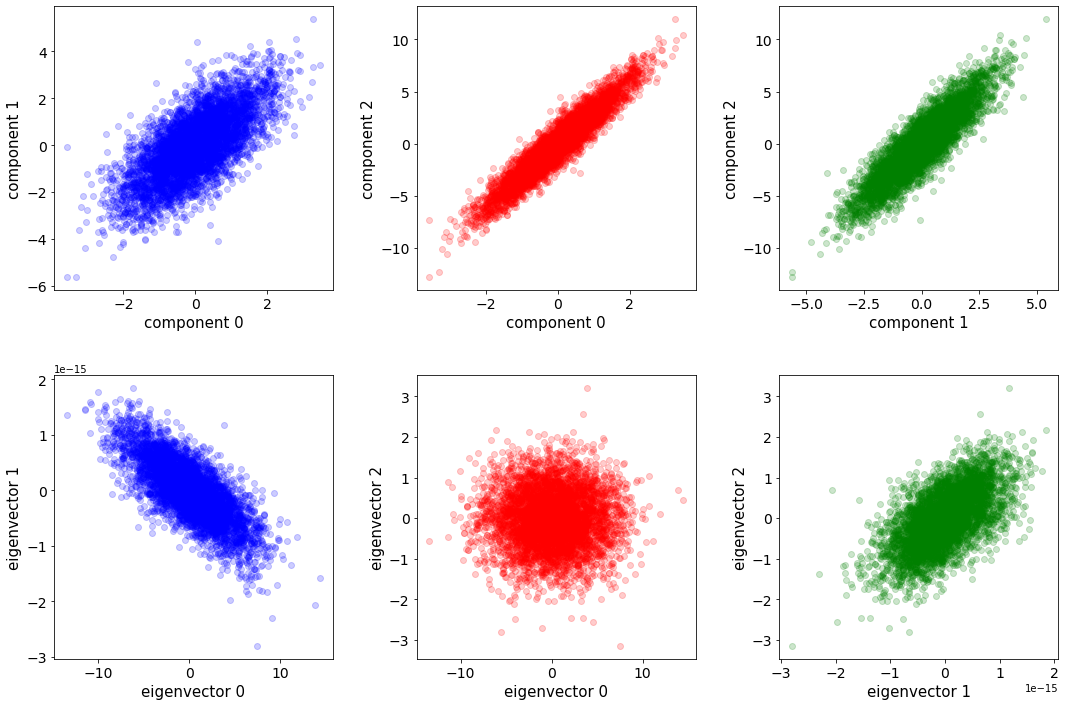

In [8]:
fig, ((ax1,ax2, ax3) , (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(18, 12)) #plotting the scatter plots comparing the points of each component of the two matrixes generated (the original and the rotated one
plt.subplots_adjust(left=None , bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


ax1.scatter(X[0,:], X[1,:], alpha=0.2, color='b', )
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel('component 0', fontsize=15)
ax1.set_ylabel('component 1', fontsize=15)

ax2.scatter(X[0,:], X[2,:], alpha=0.2, color='r', )
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel('component 0', fontsize=15)
ax2.set_ylabel('component 2', fontsize=15)

ax3.scatter(X[1,:], X[2,:], alpha=0.2, color='g', )
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_xlabel('component 1', fontsize=15)
ax3.set_ylabel('component 2', fontsize=15)


ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2, color='b', )
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax4.set_xlabel('eigenvector 0', fontsize=15)
ax4.set_ylabel('eigenvector 1', fontsize=15)


ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2, color='r', )
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)
ax5.set_xlabel('eigenvector 0', fontsize=15)
ax5.set_ylabel('eigenvector 2', fontsize=15)

ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2, color='g', )
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)
ax6.set_xlabel('eigenvector 1', fontsize=15)
ax6.set_ylabel('eigenvector 2', fontsize=15)


Lets plot the scatter plots with axis adopting all the same scale

Text(0, 0.5, 'eigenvector 2')

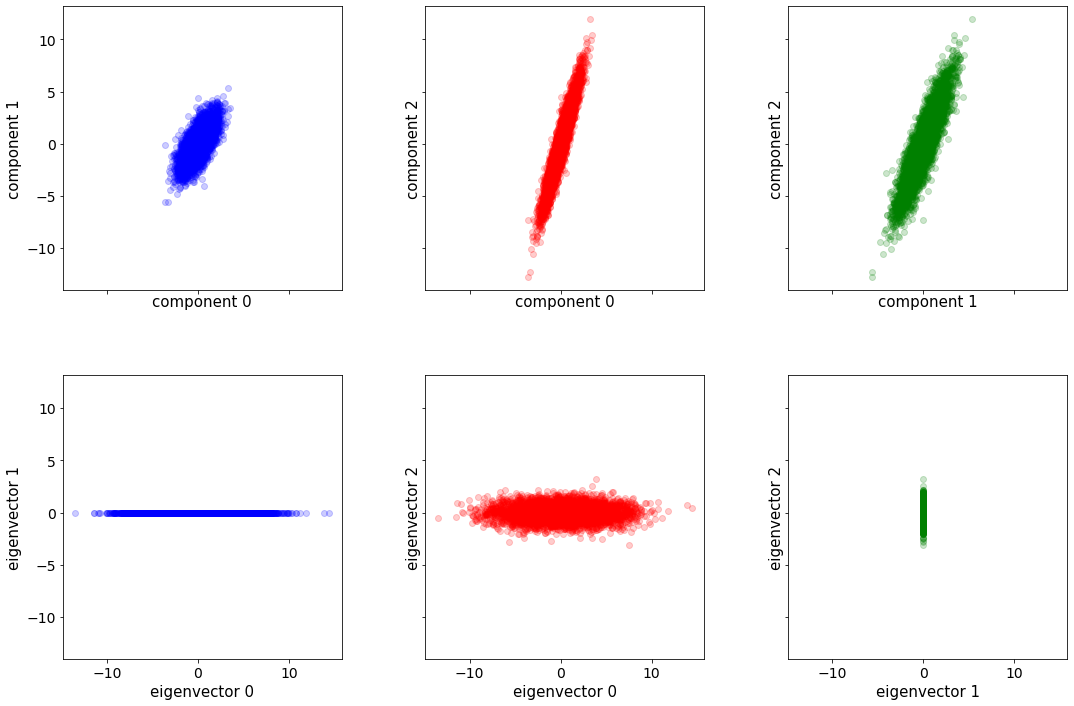

In [9]:
fig, ((ax1,ax2, ax3) , (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharex=True, sharey=True) #plotting the scatter plots comparing the points of each component of the two matrixes generated (the original and the rotated one
plt.subplots_adjust(left=None , bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


ax1.scatter(X[0,:], X[1,:], alpha=0.2, color='b', )
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel('component 0', fontsize=15)
ax1.set_ylabel('component 1', fontsize=15)

ax2.scatter(X[0,:], X[2,:], alpha=0.2, color='r', )
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel('component 0', fontsize=15)
ax2.set_ylabel('component 2', fontsize=15)

ax3.scatter(X[1,:], X[2,:], alpha=0.2, color='g', )
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_xlabel('component 1', fontsize=15)
ax3.set_ylabel('component 2', fontsize=15)


ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2, color='b', )
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax4.set_xlabel('eigenvector 0', fontsize=15)
ax4.set_ylabel('eigenvector 1', fontsize=15)


ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2, color='r', )
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)
ax5.set_xlabel('eigenvector 0', fontsize=15)
ax5.set_ylabel('eigenvector 2', fontsize=15)

ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2, color='g', )
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)
ax6.set_xlabel('eigenvector 1', fontsize=15)
ax6.set_ylabel('eigenvector 2', fontsize=15)



## Given how the dataset was constructed, is it what was expected?

In order to analyze the results it is necessary to start from the eigenvalues and their corresponding percentage of the total variability. The largest eigenvalues is the first one with a value of $\lambda=1.27188396e+01$ and a percentage of the total variability of almost $96$%. The first eigenvector is the following, $[-0.2636406383492881, -0.36543838746238977, -0.8927196641609663]$. So the  principal component is the first eigenvector.

This is confirmed also in the rotated scatter plots in which the axis are the eigenvectors. From them it is clear that the first eigenvector is the one charachterized by the largest variability and so it is possible to say that the first eigenvector is the principal component.

In the eigenvector the component with the largest absolute values is the third one. This means that the feature $x_3$ is the one that influences the most the first eigenvector.

This can be seen in the plots. In the scatter plots with axis of the same scale it is possible to see that $x_3$ has more variability respect to $x_1$ and $x_2$.

This is due to the fact that $x_3$ is the sum of both $x_1$ and $x_2$. This probably means that it brings the variability of the first two features.


It is possible to repeat the reasoning if we compare the other eigenvectors. Indeed the second largest eigenvalue is associated with the egeinvector 3. So the second principal component is the eigenvector 3. 


## 2. PCA on a nD dataset

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [10]:
#The process is the same as before from the programming poin of view, the only difference is that instead of having just three features now 
#we have 13 feature so the matrixes and the vectors are bigger
N=5000
mean=0
x_1= np.random.normal(0, 1, N).T
x_2= x_1+np.random.normal(0, 3 , N).T
x_3= 2*x_1+x_2
x_4=np.random.normal(0, 1/50 , N).T
x_5=np.random.normal(0, 1/60 , N).T
x_6=np.random.normal(0, 1/55 , N).T
x_7=np.random.normal(0, 1/45 , N).T
x_8=np.random.normal(0, 1/70 , N).T
x_9=np.random.normal(0, 1/57 , N).T
x_10=np.random.normal(0, 1/52 , N).T
x_11=np.random.normal(0, 1/51 , N).T
x_12=np.random.normal(0, 1/58 , N).T
x_13=np.random.normal(0, 1/63 , N).T

X = np.array([x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13])

print('the covaraince matrix is:')
cov=np.cov(X)
print(cov)
print('\n')


the covaraince matrix is:
[[ 9.93819861e-01  1.02248534e+00  3.01012506e+00  1.54031932e-04
   2.27969677e-04 -4.09044244e-04  3.71797814e-04 -3.48242322e-05
   5.33841415e-04 -1.32217969e-04 -3.86237550e-04  7.71750513e-05
  -1.11671383e-04]
 [ 1.02248534e+00  1.00113826e+01  1.20563532e+01 -8.24393123e-04
   5.77313646e-04 -1.40400909e-03  1.51045733e-03  1.29062614e-03
   5.87618153e-04 -1.97661933e-04 -7.54465199e-04  1.05828006e-03
  -3.71111260e-05]
 [ 3.01012506e+00  1.20563532e+01  1.80766034e+01 -5.16329259e-04
   1.03325300e-03 -2.22209758e-03  2.25405296e-03  1.22097768e-03
   1.65530098e-03 -4.62097870e-04 -1.52694030e-03  1.21263016e-03
  -2.60453892e-04]
 [ 1.54031932e-04 -8.24393123e-04 -5.16329259e-04  3.75481346e-04
  -4.84553364e-06 -2.73109480e-06 -1.11189125e-05 -1.97292795e-06
   8.60141888e-06  2.68256017e-06 -5.52427685e-06  6.17204698e-06
   3.43790879e-06]
 [ 2.27969677e-04  5.77313646e-04  1.03325300e-03 -4.84553364e-06
   2.79005638e-04 -1.91473839e-06  3.984

In [11]:
l, V = la.eig(cov) #calculating the eigenvectors and the eigenvalues of the covarianve matrix

print('eigenvalues') 
print (l) #printing the eigenvalues
print('\n')
print('eigenvectors')
print (V) #printing the eigenvectors
print('\n')
for i in range(1,14):
    print(f'the eigenvector {i} is: {[V[0][i-1],V[1][i-1],V[2][i-1]],V[3][i-1],V[4][i-1],V[5][i-1],V[6][i-1],V[7][i-1],V[8][i-1],V[9][i-1],V[10][i-1],V[11][i-1],V[12][i-1]}')
    print('\n')
    
print('\n')
print('the covariance matrix calculated with the eigenvectors and the eigenvalues')
print(np.dot(V,np.dot(np.diag(l),V.T)))
print('\n')

Lambda=np.diag(l) #calculating the diagonal matrix of the eigenvalues
print('the diagonal matrix of the eigenvalues is:')
print (Lambda) #printing the diagonal matrix of the eigenvalues

print('\n')
print ("trace of the covariance matrix:", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print('\n')
print('the variability of the components is explained by the next values(eigenvalues normalized with the trace):')
print (f'for the first eigenvalue it is:{Lambda[0,0]/(Lambda.trace())}') #calculating the eigenvalues normalized with the trace
print (f'for the second eigenvalue it is:{Lambda[1,1]/Lambda.trace()}')
print (f'for the third eigenvalue it is:{Lambda[2,2]/Lambda.trace()}')
print (f'for the 4th eigenvalue it is:{Lambda[3,3]/Lambda.trace()}')
print (f'for the 5th eigenvalue it is:{Lambda[4,4]/Lambda.trace()}')
print (f'for the 6th eigenvalue it is:{Lambda[5,5]/Lambda.trace()}')
print (f'for the 7th eigenvalue it is:{Lambda[6,6]/Lambda.trace()}')
print (f'for the 8th eigenvalue it is:{Lambda[7,7]/Lambda.trace()}')
print (f'for the 9th eigenvalue it is:{Lambda[8,8]/Lambda.trace()}')
print (f'for the 10th eigenvalue it is:{Lambda[9,9]/Lambda.trace()}')
print (f'for the 11th eigenvalue it is:{Lambda[10,10]/Lambda.trace()}')
print (f'for the 12th eigenvalue it is:{Lambda[11,11]/Lambda.trace()}')
print (f'for the 13th eigenvalue it is:{Lambda[12,12]/Lambda.trace()}')




eigenvalues
[ 2.71112520e+01+0.j  1.97055536e+00+0.j -4.35535304e-16+0.j
  5.08392603e-04+0.j  2.03930141e-04+0.j  4.00433203e-04+0.j
  3.77528530e-04+0.j  3.60876490e-04+0.j  2.57996194e-04+0.j
  2.74977307e-04+0.j  2.92451409e-04+0.j  3.11818824e-04+0.j
  3.18645331e-04+0.j]


eigenvectors
[[ 1.15772612e-01 -5.65623507e-01 -8.16496581e-01  2.27141510e-05
  -1.01884980e-04 -1.35851009e-04  1.24977815e-04 -1.49213741e-05
  -6.69249482e-05  1.10874067e-04 -7.06841918e-05 -1.29614337e-04
   2.96458673e-06]
 [ 5.76971954e-01  7.07415421e-01 -4.08248290e-01  4.53083653e-05
   1.77031110e-04  1.25757228e-04 -1.65307446e-04  3.86741651e-05
   6.53453921e-05 -1.08560219e-04  1.28785337e-04  8.73950822e-05
  -4.18534456e-05]
 [ 8.08517178e-01 -4.23831594e-01  4.08248290e-01  9.07366673e-05
  -2.67388510e-05 -1.45944791e-04  8.46481846e-05  8.83141695e-06
  -6.85045042e-05  1.13187915e-04 -1.25830463e-05 -1.71833592e-04
  -3.59242721e-05]
 [-3.22852018e-05 -2.29155740e-04 -9.78400866e-16  8.457

In [12]:
print('the reduced dataset is the one including the second and the third feature')
Y=np.array([x_2,x_3])
print(Y)

the reduced dataset is the one including the second and the third feature
[[ 1.19534083 -3.14732301 -0.5588082  ...  1.04484574  1.48948585
  -2.38258336]
 [ 2.63806359 -6.11431349  2.9852227  ...  0.58489376  1.89231916
  -2.3044199 ]]


In [13]:
Xp = np.dot(V.T, X) #rotating the original matrix 

Text(0, 0.5, 'eigenvector 2')

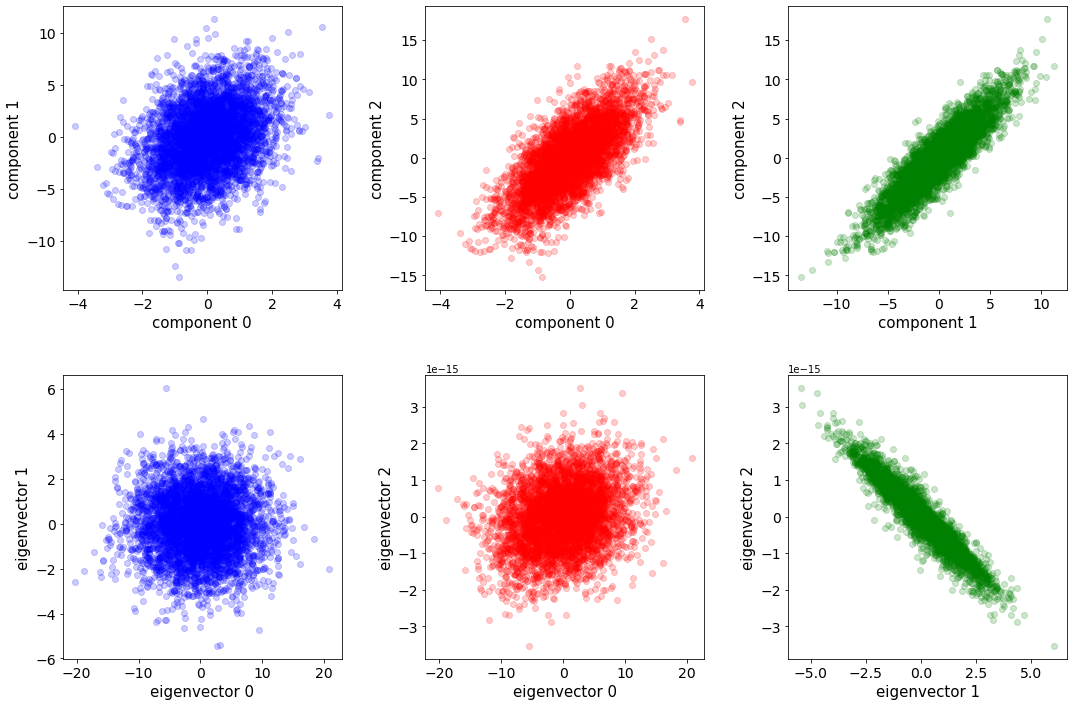

In [14]:
fig, ((ax1,ax2, ax3) , (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(18, 12)) #plotting the scatter plots comparing the points of each component of the two matrixes generated (the original and the rotated one
plt.subplots_adjust(left=None , bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


ax1.scatter(X[0,:], X[1,:], alpha=0.2, color='b', )
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel('component 0', fontsize=15)
ax1.set_ylabel('component 1', fontsize=15)

ax2.scatter(X[0,:], X[2,:], alpha=0.2, color='r', )
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel('component 0', fontsize=15)
ax2.set_ylabel('component 2', fontsize=15)

ax3.scatter(X[1,:], X[2,:], alpha=0.2, color='g', )
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_xlabel('component 1', fontsize=15)
ax3.set_ylabel('component 2', fontsize=15)


ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2, color='b', )
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax4.set_xlabel('eigenvector 0', fontsize=15)
ax4.set_ylabel('eigenvector 1', fontsize=15)


ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2, color='r', )
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)
ax5.set_xlabel('eigenvector 0', fontsize=15)
ax5.set_ylabel('eigenvector 2', fontsize=15)

ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2, color='g', )
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)
ax6.set_xlabel('eigenvector 1', fontsize=15)
ax6.set_ylabel('eigenvector 2', fontsize=15)



Lets plot the scatter plots with axis adopting all the same scale

Text(0, 0.5, 'eigenvector 2')

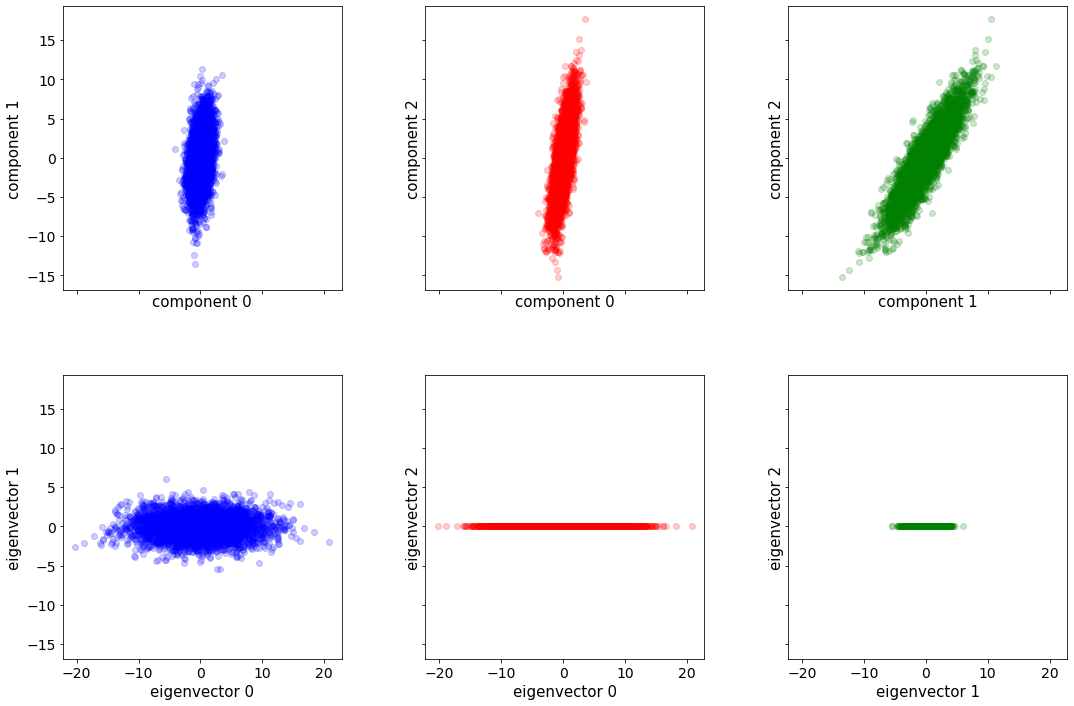

In [15]:
fig, ((ax1,ax2, ax3) , (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharex=True, sharey=True) #plotting the scatter plots comparing the points of each component of the two matrixes generated (the original and the rotated one
plt.subplots_adjust(left=None , bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


ax1.scatter(X[0,:], X[1,:], alpha=0.2, color='b', )
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel('component 0', fontsize=15)
ax1.set_ylabel('component 1', fontsize=15)

ax2.scatter(X[0,:], X[2,:], alpha=0.2, color='r', )
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel('component 0', fontsize=15)
ax2.set_ylabel('component 2', fontsize=15)

ax3.scatter(X[1,:], X[2,:], alpha=0.2, color='g', )
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_xlabel('component 1', fontsize=15)
ax3.set_ylabel('component 2', fontsize=15)


ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2, color='b', )
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)
ax4.set_xlabel('eigenvector 0', fontsize=15)
ax4.set_ylabel('eigenvector 1', fontsize=15)


ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2, color='r', )
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)
ax5.set_xlabel('eigenvector 0', fontsize=15)
ax5.set_ylabel('eigenvector 2', fontsize=15)

ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2, color='g', )
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)
ax6.set_xlabel('eigenvector 1', fontsize=15)
ax6.set_ylabel('eigenvector 2', fontsize=15)


